In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2.Load Dataset
data = pd.read_csv("hanoi_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2024,46,42,12,3,8,6
1,2/29/2024,55,27,11,3,8,5
2,2/28/2024,86,29,9,2,8,4
3,2/27/2024,47,43,5,3,8,6
4,2/26/2024,62,26,6,3,8,4
...,...,...,...,...,...,...,...
1823,3/5/2019,2,34,15,21,6,6
1824,3/4/2019,118,56,13,22,14,6
1825,3/3/2019,10,64,1,22,16,5
1826,3/2/2019,117,64,4,28,3,5


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1828 non-null   object
 1   pm25    1828 non-null   int64 
 2   pm10    1828 non-null   int64 
 3   o3      1828 non-null   int64 
 4   no2     1828 non-null   int64 
 5   so2     1828 non-null   int64 
 6   co      1828 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 100.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,62.036105,38.157549,16.830963,20.262035,11.857221,7.595186
std,40.149267,21.792154,16.902612,9.419363,6.511483,3.030084
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,31.000000,21.000000,7.000000,13.750000,7.000000,5.000000
50%,53.000000,35.000000,14.000000,20.000000,11.000000,7.000000
75%,86.000000,53.000000,21.250000,27.000000,17.000000,9.000000
max,217.000000,121.000000,441.000000,53.000000,43.000000,21.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,46
1,55
2,86
3,47
4,62
...,...
1823,2
1824,118
1825,10
1826,117


<Axes: >

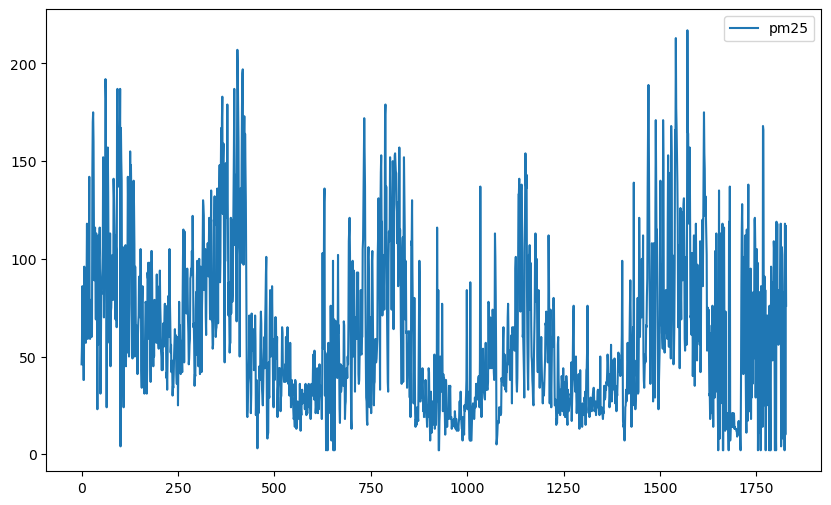

In [5]:
data.plot(figsize=(10,6))

In [6]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.9 * len(data))
test_size = int(0.1 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1645
Test data size: 183


In [7]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['pm25'])
y_pred = model.predict(x_test)


In [9]:
#5 Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo mảng 30 ngày tiếp theo
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán
y_next_30_days = model.predict(x_next_30_days)

# In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[48.25976033 48.24509954 48.23043875 48.21577797 48.20111718 48.1864564
 48.17179561 48.15713483 48.14247404 48.12781326 48.11315247 48.09849168
 48.0838309  48.06917011 48.05450933 48.03984854 48.02518776 48.01052697
 47.99586618 47.9812054  47.96654461 47.95188383 47.93722304 47.92256226
 47.90790147 47.89324069 47.8785799  47.86391911 47.84925833 47.83459754]


In [15]:
# 6. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 7. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 8. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)



Testing RMSE: 40.63204733062328

Testing MAPE: 291.11632742567866

MAE: 35.00291649375164


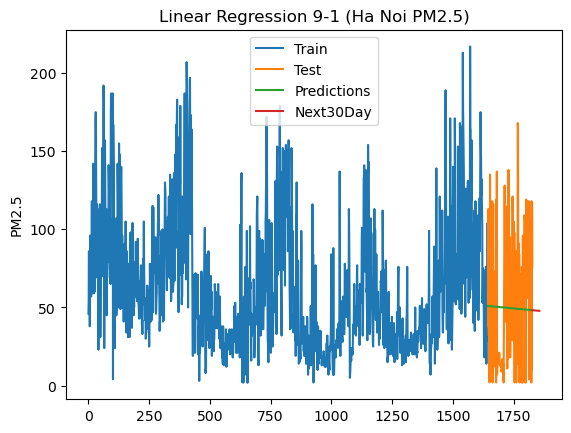

In [11]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('Linear Regression 9-1 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()

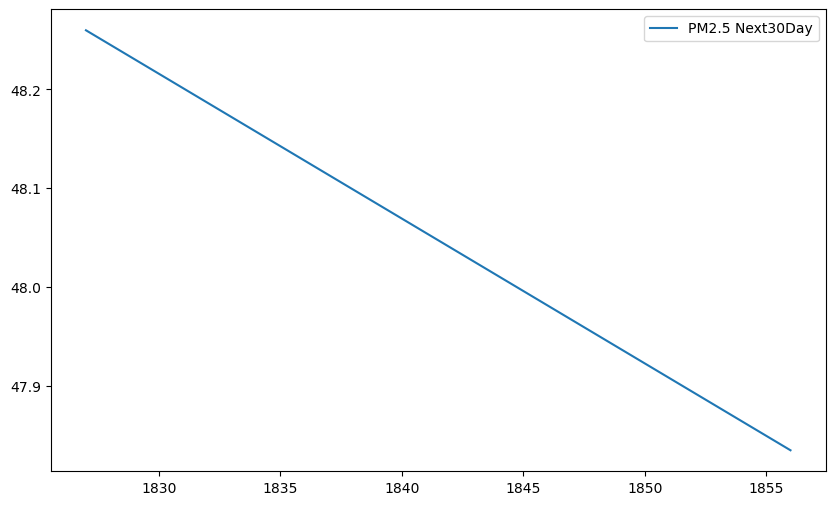

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(last_data,y_next_30_days)
plt.legend(['PM2.5 Next30Day'])
plt.show()

In [13]:
test_data.index

RangeIndex(start=1645, stop=1828, step=1)